## 4. Exploratory Analysis / EDA 

Wir analysieren jetzt den gesamten Datensatz aus einer und mehreren Dimensionen

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling  
import missingno as msno

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Zielverzeichnis (bitte anpassen)
TARGET_DIR = r"/Users/danielmini/Projekte/data_analyics26/data_analytics_master/2_data_acquisition/processed_data"

# CSV-Datei finden und laden
csv_files = [f for f in os.listdir(TARGET_DIR) if f.endswith(".csv")]
df = pd.read_csv(os.path.join(TARGET_DIR, csv_files[0]))

print("DataFrame geladen:", df.shape)

DataFrame geladen: (19158, 14)


## Deskriptive Analyse der Variablen
------------------------------------

- 4.1.) Univariate Analyse, Modus, Lagemaße, Verteilung, Auffälligkeiten 
- 4.2.) Bivariate Analyse, paarweiser vergleich, meist, Kategorie und nummerische Variabel vergleichen 
- 4.3.) Mehrdimensional, wenn möglich

### Analyse der Nominalen Variablen zuerst

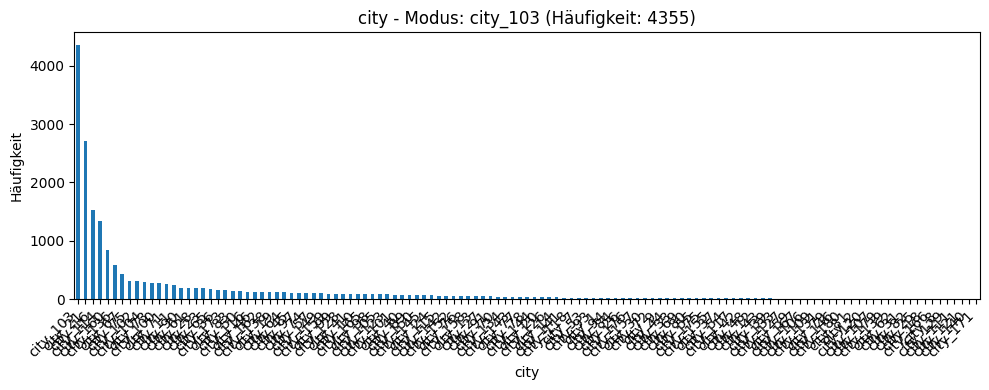


city:
  Modus: city_103
  Häufigkeit: 4355


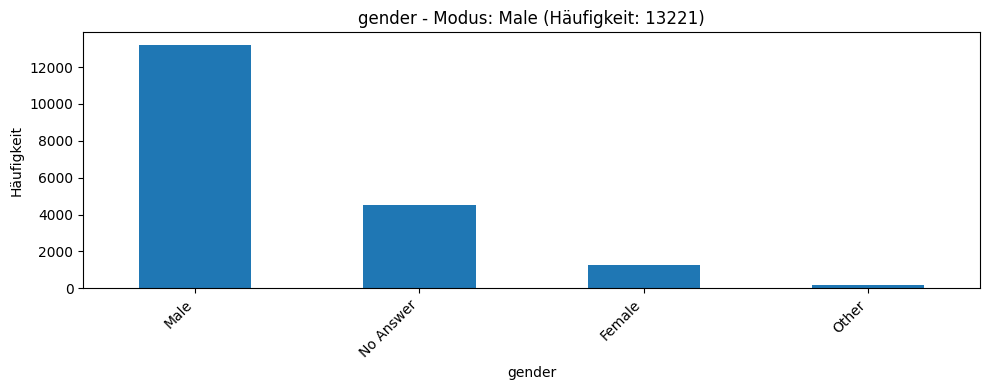


gender:
  Modus: Male
  Häufigkeit: 13221


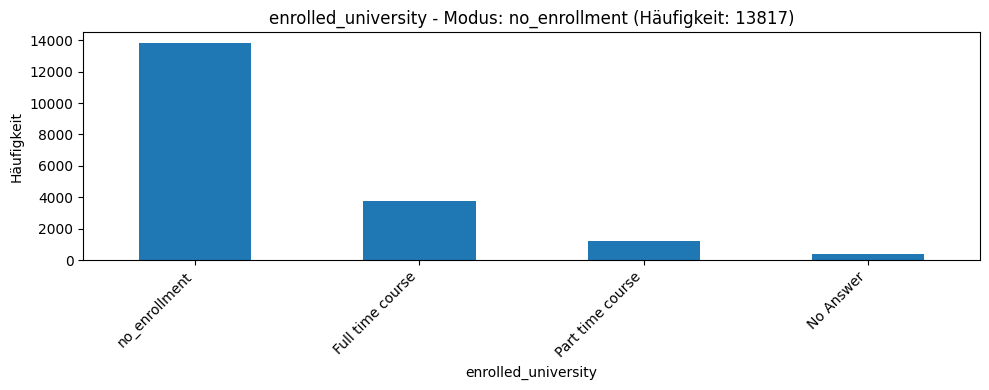


enrolled_university:
  Modus: no_enrollment
  Häufigkeit: 13817


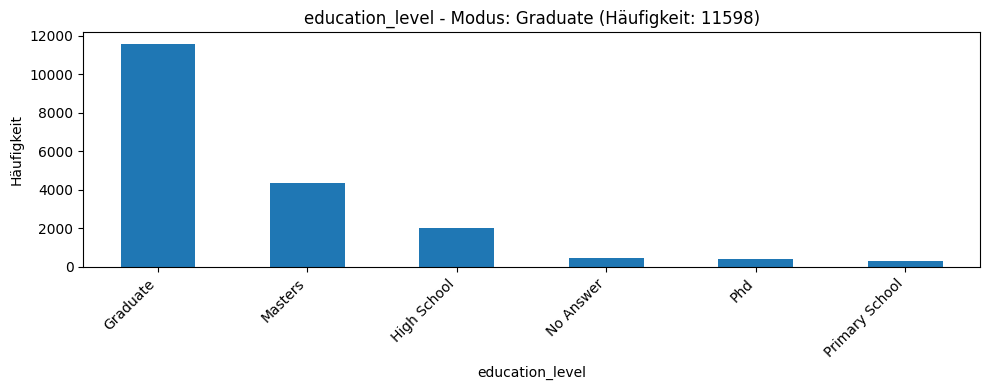


education_level:
  Modus: Graduate
  Häufigkeit: 11598


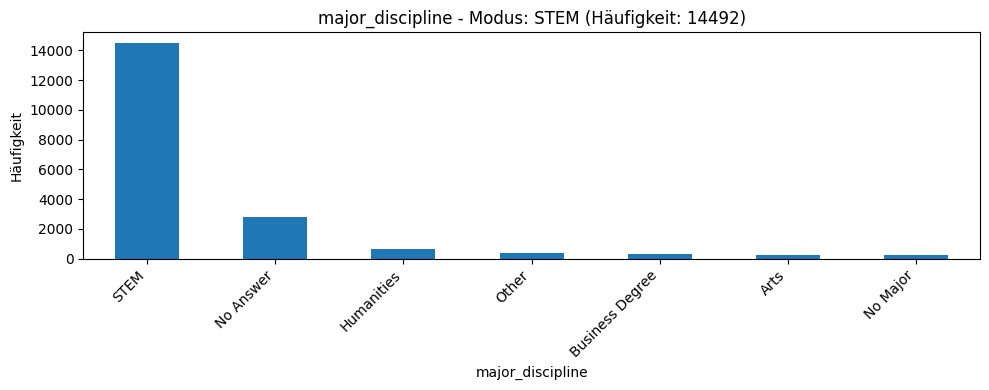


major_discipline:
  Modus: STEM
  Häufigkeit: 14492


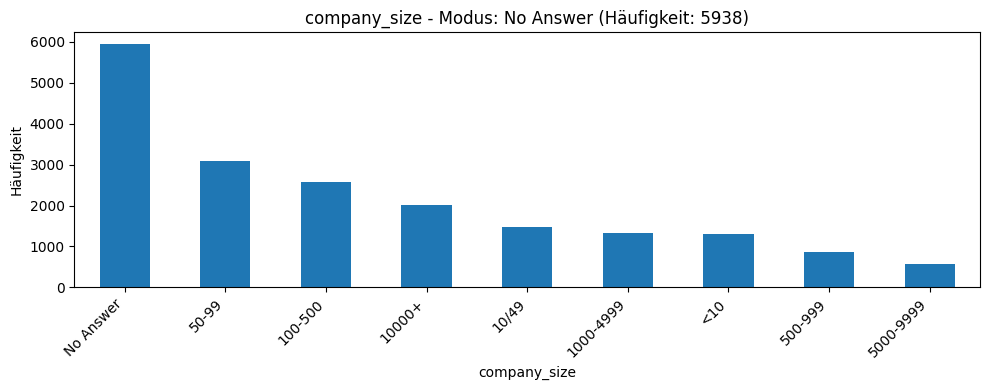


company_size:
  Modus: No Answer
  Häufigkeit: 5938


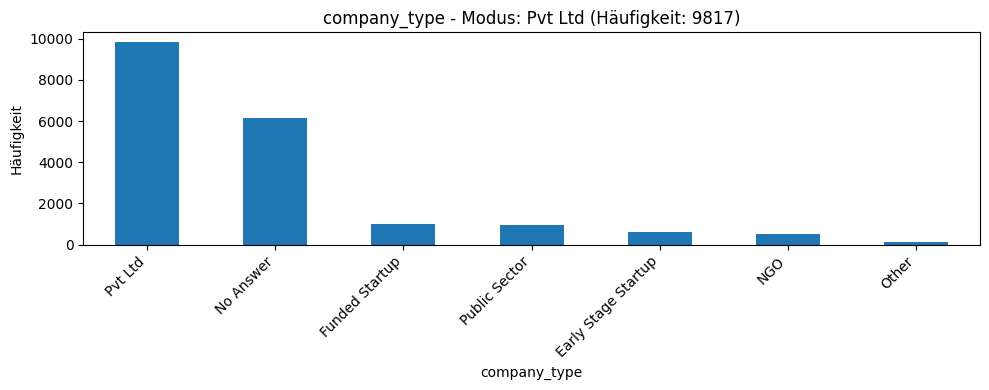


company_type:
  Modus: Pvt Ltd
  Häufigkeit: 9817


In [3]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create bar charts and calculate mode for each categorical variable
for col in categorical_cols:
    # Calculate mode
    mode_value = df[col].mode()[0]
    mode_count = df[col].value_counts()[mode_value]
    
    # Create bar chart
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} - Modus: {mode_value} (Häufigkeit: {mode_count})')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{col}:")
    print(f"  Modus: {mode_value}")
    print(f"  Häufigkeit: {mode_count}")

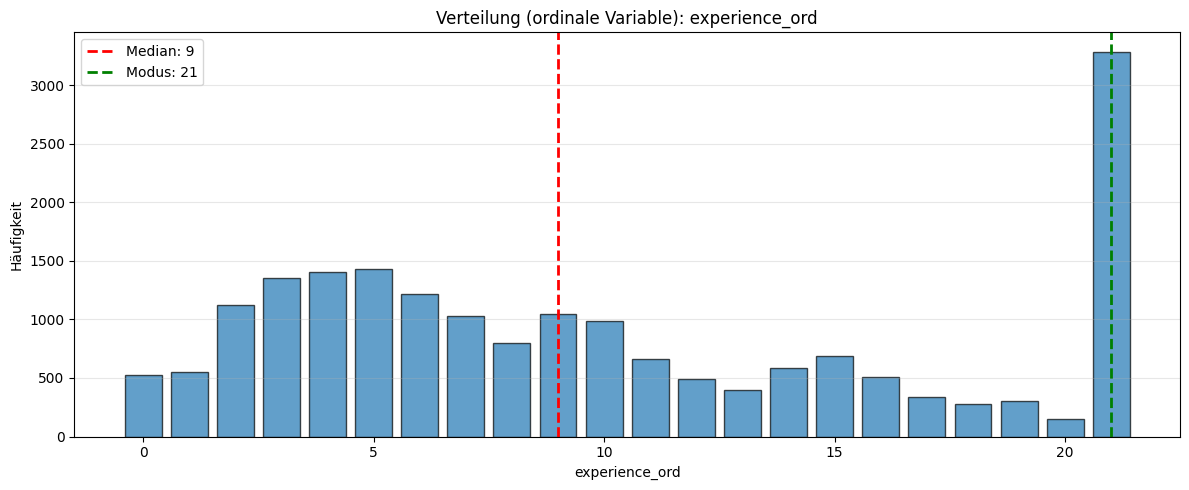


Statistiken für ordinale Variable: experience_ord
  Median:            9
  Modus:             21
  Minimum:           0
  1. Quartil (Q25):  4
  3. Quartil (Q75):  16
  Maximum:           21
  IQR (Q75-Q25):     12
  Anzahl Kategorien: 22

Häufigkeitsverteilung:
  experience_ord = 0:   522 ( 2.72%)
  experience_ord = 1:   549 ( 2.87%)
  experience_ord = 2:  1127 ( 5.88%)
  experience_ord = 3:  1354 ( 7.07%)
  experience_ord = 4:  1403 ( 7.32%)
  experience_ord = 5:  1430 ( 7.46%)
  experience_ord = 6:  1216 ( 6.35%)
  experience_ord = 7:  1028 ( 5.37%)
  experience_ord = 8:   802 ( 4.19%)
  experience_ord = 9:  1045 ( 5.45%)
  experience_ord = 10:   985 ( 5.14%)
  experience_ord = 11:   664 ( 3.47%)
  experience_ord = 12:   494 ( 2.58%)
  experience_ord = 13:   399 ( 2.08%)
  experience_ord = 14:   586 ( 3.06%)
  experience_ord = 15:   686 ( 3.58%)
  experience_ord = 16:   508 ( 2.65%)
  experience_ord = 17:   342 ( 1.79%)
  experience_ord = 18:   280 ( 1.46%)
  experience_ord = 19:  

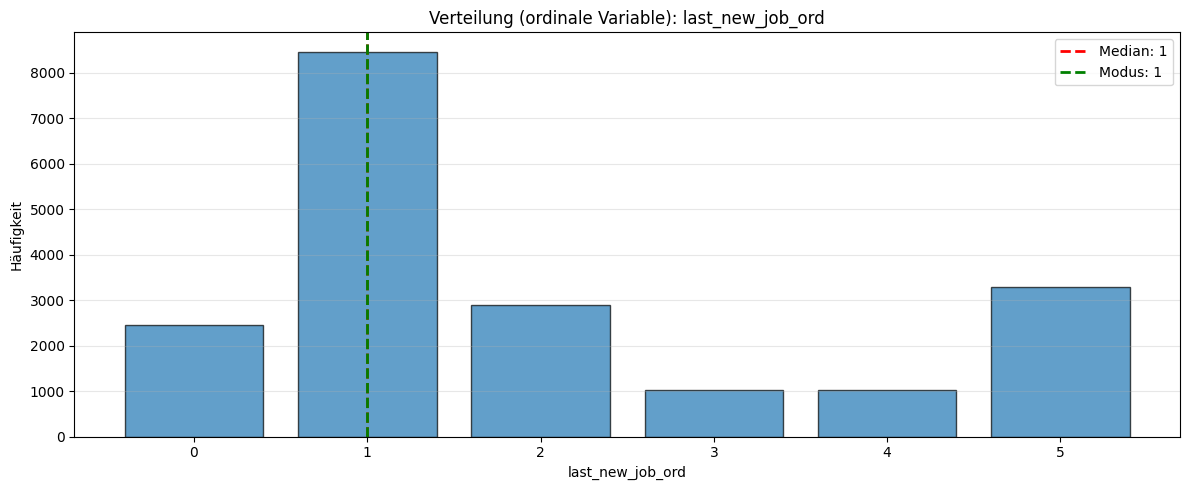


Statistiken für ordinale Variable: last_new_job_ord
  Median:            1
  Modus:             1
  Minimum:           0
  1. Quartil (Q25):  1
  3. Quartil (Q75):  3
  Maximum:           5
  IQR (Q75-Q25):     2
  Anzahl Kategorien: 6

Häufigkeitsverteilung:
  last_new_job_ord = 0:  2452 (12.80%)
  last_new_job_ord = 1:  8463 (44.17%)
  last_new_job_ord = 2:  2900 (15.14%)
  last_new_job_ord = 3:  1024 ( 5.35%)
  last_new_job_ord = 4:  1029 ( 5.37%)
  last_new_job_ord = 5:  3290 (17.17%)


In [4]:
# Get ordinal columns (numerical columns that represent ordered categories)
ordinal_cols = ['experience_ord', 'last_new_job_ord']

# Create bar charts and display statistics for each ordinal variable
for col in ordinal_cols:
    # Calculate statistics
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Value counts for bar chart
    value_counts = df[col].value_counts().sort_index()
    
    # Create figure with bar chart
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    
    # Bar chart
    ax.bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
    ax.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f'Median: {median_val:.0f}')
    ax.axvline(mode_val, color='green', linestyle='--', linewidth=2, label=f'Modus: {mode_val:.0f}')
    ax.set_title(f'Verteilung (ordinale Variable): {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Häufigkeit')
    ax.legend()
    ax.grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Statistiken für ordinale Variable: {col}")
    print(f"{'='*60}")
    print(f"  Median:            {median_val:.0f}")
    print(f"  Modus:             {mode_val:.0f}")
    print(f"  Minimum:           {min_val:.0f}")
    print(f"  1. Quartil (Q25):  {q25:.0f}")
    print(f"  3. Quartil (Q75):  {q75:.0f}")
    print(f"  Maximum:           {max_val:.0f}")
    print(f"  IQR (Q75-Q25):     {q75 - q25:.0f}")
    print(f"  Anzahl Kategorien: {df[col].nunique()}")
    print(f"\nHäufigkeitsverteilung:")
    for idx, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {col} = {idx:.0f}: {count:5d} ({percentage:5.2f}%)")

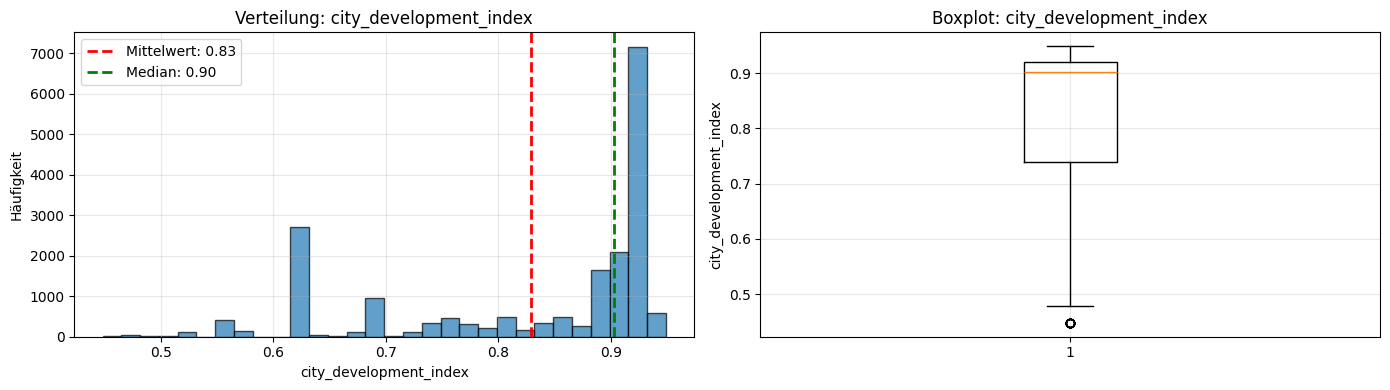


Statistiken für: city_development_index
  Mittelwert:        0.83
  Median:            0.90
  Standardabweichung: 0.12
  Minimum:           0.45
  1. Quartil (Q25):  0.74
  3. Quartil (Q75):  0.92
  Maximum:           0.95
  Spannweite:        0.50
  IQR (Q75-Q25):     0.18


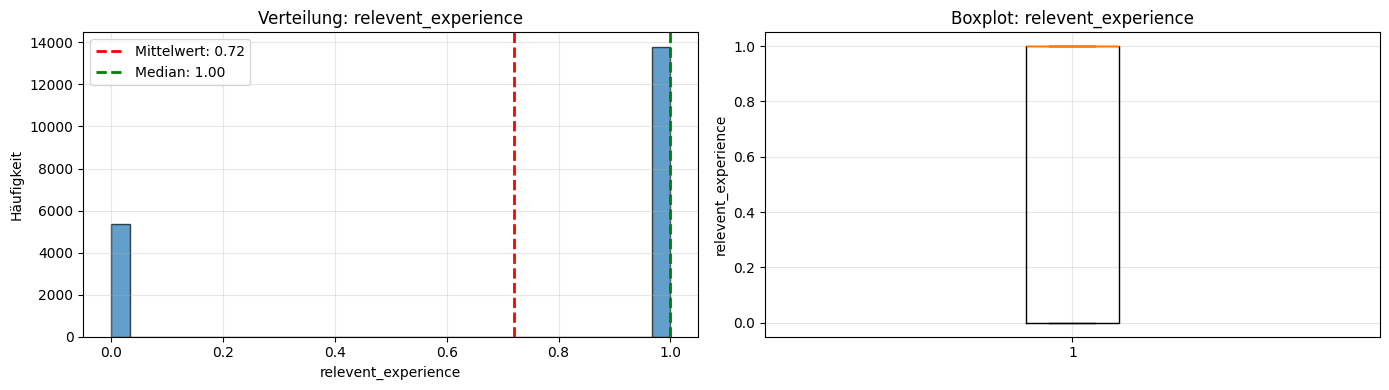


Statistiken für: relevent_experience
  Mittelwert:        0.72
  Median:            1.00
  Standardabweichung: 0.45
  Minimum:           0.00
  1. Quartil (Q25):  0.00
  3. Quartil (Q75):  1.00
  Maximum:           1.00
  Spannweite:        1.00
  IQR (Q75-Q25):     1.00


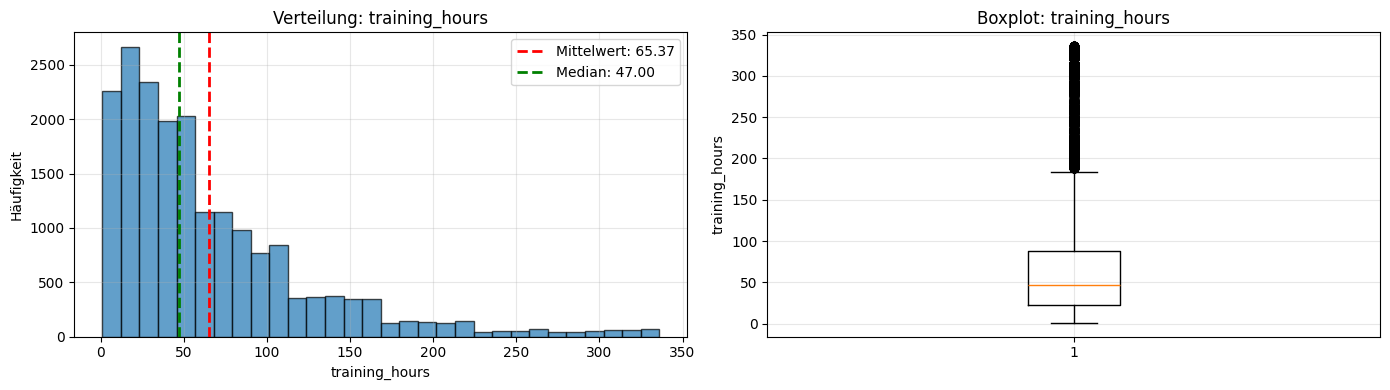


Statistiken für: training_hours
  Mittelwert:        65.37
  Median:            47.00
  Standardabweichung: 60.06
  Minimum:           1.00
  1. Quartil (Q25):  23.00
  3. Quartil (Q75):  88.00
  Maximum:           336.00
  Spannweite:        335.00
  IQR (Q75-Q25):     65.00


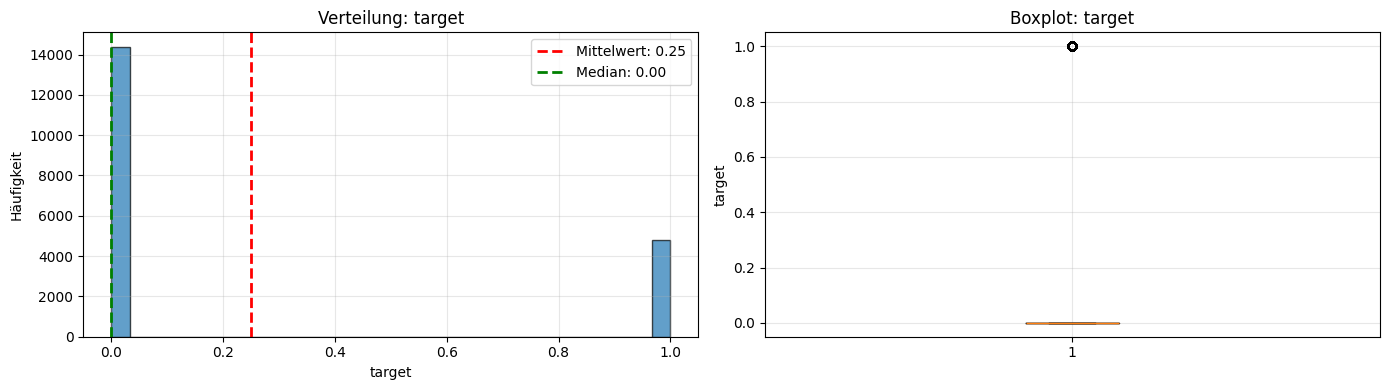


Statistiken für: target
  Mittelwert:        0.25
  Median:            0.00
  Standardabweichung: 0.43
  Minimum:           0.00
  1. Quartil (Q25):  0.00
  3. Quartil (Q75):  0.00
  Maximum:           1.00
  Spannweite:        1.00
  IQR (Q75-Q25):     0.00


In [5]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
# Exclude ID column
numerical_cols = [col for col in numerical_cols if col not in ['enrollee_id', 'experience_ord', 'last_new_job_ord']]

# Create histograms and display statistics for each numerical variable
for col in numerical_cols:
    # Calculate statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Create figure with histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Histogram with KDE
    axes[0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mittelwert: {mean_val:.2f}')
    axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0].set_title(f'Verteilung: {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Häufigkeit')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(df[col].dropna(), vert=True)
    axes[1].set_title(f'Boxplot: {col}')
    axes[1].set_ylabel(col)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Statistiken für: {col}")
    print(f"{'='*60}")
    print(f"  Mittelwert:        {mean_val:.2f}")
    print(f"  Median:            {median_val:.2f}")
    print(f"  Standardabweichung: {std_val:.2f}")
    print(f"  Minimum:           {min_val:.2f}")
    print(f"  1. Quartil (Q25):  {q25:.2f}")
    print(f"  3. Quartil (Q75):  {q75:.2f}")
    print(f"  Maximum:           {max_val:.2f}")
    print(f"  Spannweite:        {max_val - min_val:.2f}")
    print(f"  IQR (Q75-Q25):     {q75 - q25:.2f}")